In [1]:
import numpy as np
import matplotlib.pyplot as plt
from KRR import KRR_covariate_shift


In [2]:
fcn = 'C' # true function
sigma = 0.5 # standard deviation of noise
beta = 2 # ratio parameter in the grid of lambdas
seed = 10000 # random seed


n = 500 # number of source samples
rho = 0.5 # split ratio
n_0 = int(n * rho) # number of unlabeled target samples
B = 5 # parameter of distribution shift


# run experiment
test = KRR_covariate_shift(n, n_0, B, sigma, fcn, seed)
test.estimate(rho = rho, beta = beta)


# evaluation: estimate target MSE using new samples
N_test = 1000 # number of new testing samples for evaluation
test.evaluate(N_test = N_test, seed = seed)
res = [test.err_naive, test.err_pseudo, test.err_real]
print('Target MSE: ')
print('Naive: {}'.format(res[0]))
print('Pseudo-Labeling: {}'.format(res[1]))
print('Oracle: {}'.format(res[2]))


# report selected lambdas
lbds = [test.lbd_naive, test.lbd_pseudo, test.lbd_real]
print('')
print('Selected lambdas: ')
print('Naive: {}'.format(lbds[0]))
print('Pseudo-Labeling: {}'.format(lbds[1]))
print('Oracle: {}'.format(lbds[2]))



Target MSE: 
Naive: 0.021394838519278068
Pseudo-Labeling: 0.009120868337934268
Oracle: 0.00549582798501336

Selected lambdas: 
Naive: 0.0032
Pseudo-Labeling: 0.0016
Oracle: 0.0008


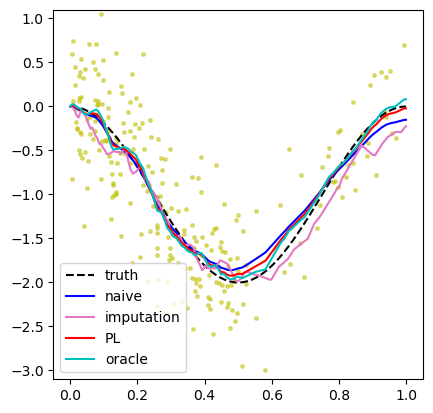

In [3]:
# Visualization
# True function: black dashed line
# Source data: yellow dots
# Naive method (hold-out validation using source data): blue
# Imputation model (undersmoothed): pink
# New method (hold-out validation with pseudo-labels): red
# Oracle method (validation with noiseless true labels): cyan

X_new = np.arange(0, 1, 0.001)
test.predict(X_new)

fig, ax = plt.subplots()
xlim = [-0.05, 1.05]
ylim = [-3.1, 1.1]


plt.ylim(ylim)
plt.xlim(xlim)
plt.plot(test.X_1, test.y_1, 'y.', alpha = 0.5, markersize = 5, label = '_nolegend_')
plt.plot(X_new, test.y_new_true, 'k--', label = 'truth')
plt.plot(X_new, test.y_new_naive, 'b-', label = 'naive')
plt.plot(X_new, test.y_new_tilde, color = 'tab:pink', label = 'imputation')
plt.plot(X_new, test.y_new_pseudo, 'r-', label = 'PL')
plt.plot(X_new, test.y_new_real, 'c-', label = 'oracle')

plt.legend(loc = 'lower left')
ax.set_aspect( (xlim[1] - xlim[0]) / (ylim[1] - ylim[0]) )    
plt.show()

fig.savefig('demo.pdf', format = 'pdf', transparent=True)

